In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import warnings

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action='ignore') 

from src import crs, PublicPredictor
from src.dbc import utils, TimeDivisionKMeans

In [3]:
# 1. load_excel
data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
p, m = crs.utils.data_preprocessing(xlsx)

m.set_index("month", inplace=True)

# 3. data init
_month = 1

month_df = pd.DataFrame(m.loc[_month])
month_df.reset_index(inplace=True)

month_df.columns = ['name', 'usage (kWh)']

PUBLIC_PERCENTAGE = 30
APT = crs.utils.get_APT(month_df, PUBLIC_PERCENTAGE)

calc = crs.models.ManagementOffice(
        month=_month,
        households=month_df,
        APT=APT,
        contract="단일계약"
    )
apt = calc.apart

In [4]:
fee = calc.fee
public_bill = calc.public_bill
public_bill

2640560

In [5]:
_public_bill = public_bill / len(month_df)
_public_bill

24449.62962962963

# 데이터 준비

In [6]:
m_15 = utils.data_preprocessing(xlsx)

df = utils.dimension_reduction(m_15)
m_60 = df.copy()

m_60.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2018-05-01 00:00:00,0.341,0.121,0.245,0.009,0.085,0.154,0.161,0.311,0.358,0.177,...,0.372,0.181,0.322,0.374,0.571,0.453,0.161,0.127,0.259,0.364
2018-05-01 01:00:00,0.337,0.186,0.285,0.010,0.071,0.127,0.179,0.225,0.206,0.178,...,0.245,0.238,0.292,0.382,0.327,0.352,0.172,0.133,0.234,0.286
2018-05-01 02:00:00,0.324,0.214,0.487,0.009,0.061,0.139,0.182,0.221,0.150,0.152,...,0.245,0.250,0.287,0.320,0.359,0.366,0.242,0.219,0.197,0.368
2018-05-01 03:00:00,0.319,0.250,0.300,0.009,0.067,0.132,0.172,0.274,0.142,0.205,...,0.177,0.223,0.329,0.170,0.322,0.267,0.269,0.164,0.229,0.414
2018-05-01 04:00:00,0.235,0.199,0.107,0.009,0.047,0.131,0.153,0.255,0.139,0.169,...,0.129,0.171,0.301,0.168,0.351,0.255,0.170,0.132,0.198,0.318


In [7]:
# 1월치 데이터 파싱
m_15_1 = m_15[m_15.index.month == 1].copy()
m_15_1.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2019-01-01 00:00:00,0.008,0.0,0.013,0.009,0.015,0.100,0.059,0.026,0.090,0.066,...,0.068,0.024,0.090,0.097,0.131,0.103,0.115,0.062,0.090,0.172
2019-01-01 00:15:00,0.008,0.0,0.007,0.009,0.016,0.083,0.061,0.059,0.106,0.021,...,0.141,0.049,0.112,0.103,0.094,0.187,0.125,0.076,0.048,0.165
2019-01-01 00:30:00,0.008,0.0,0.007,0.010,0.016,0.077,0.057,0.078,0.098,0.082,...,0.174,0.068,0.094,0.062,0.124,0.165,0.146,0.061,0.085,0.185
2019-01-01 00:45:00,0.009,0.0,0.007,0.009,0.015,0.062,0.063,0.132,0.079,0.074,...,0.151,0.047,0.104,0.056,0.071,0.171,0.098,0.090,0.082,0.130
2019-01-01 01:00:00,0.008,0.0,0.012,0.009,0.016,0.037,0.071,0.111,0.084,0.045,...,0.112,0.065,0.080,0.065,0.104,0.124,0.127,0.089,0.064,0.153


In [8]:
m_60_1 = m_60[m_60.index.month == 1].copy()
m_60_1.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2019-01-01 00:00:00,0.033,0.000,0.034,0.037,0.062,0.322,0.240,0.295,0.373,0.243,...,0.534,0.188,0.400,0.318,0.420,0.626,0.484,0.289,0.305,0.652
2019-01-01 01:00:00,0.048,0.000,0.033,0.037,0.063,0.185,0.257,0.397,0.257,0.228,...,0.396,0.434,0.355,0.250,0.465,0.409,0.459,0.336,0.332,0.557
2019-01-01 02:00:00,0.032,0.000,0.039,0.036,0.062,0.175,0.384,0.353,0.123,0.141,...,0.194,0.337,0.379,0.274,0.326,0.307,0.405,0.382,0.311,0.491
2019-01-01 03:00:00,0.033,0.000,0.039,0.037,0.062,0.167,0.276,0.488,0.142,0.159,...,0.286,0.263,0.375,0.264,0.336,0.345,0.298,0.291,0.261,0.511
2019-01-01 04:00:00,0.032,0.001,0.033,0.037,0.063,0.197,0.266,0.278,0.190,0.227,...,0.275,0.245,0.310,0.423,0.360,0.364,0.212,0.347,0.294,0.507


# 클러스터링 셋팅
- TimeDivisionKMeans 다시 개발

In [9]:
from sklearn.metrics.pairwise import euclidean_distances as euc

datas = m_60_1.T.values

mean_pat = np.expand_dims(datas.mean(axis=0), axis=0)
euc(mean_pat, datas).argmin()


72

In [10]:
from src.TimeDivisionKMeans import TimeDivisionKMeans

tdKMeans = TimeDivisionKMeans(datas=m_60_1.T.values)

ECV : 57 %


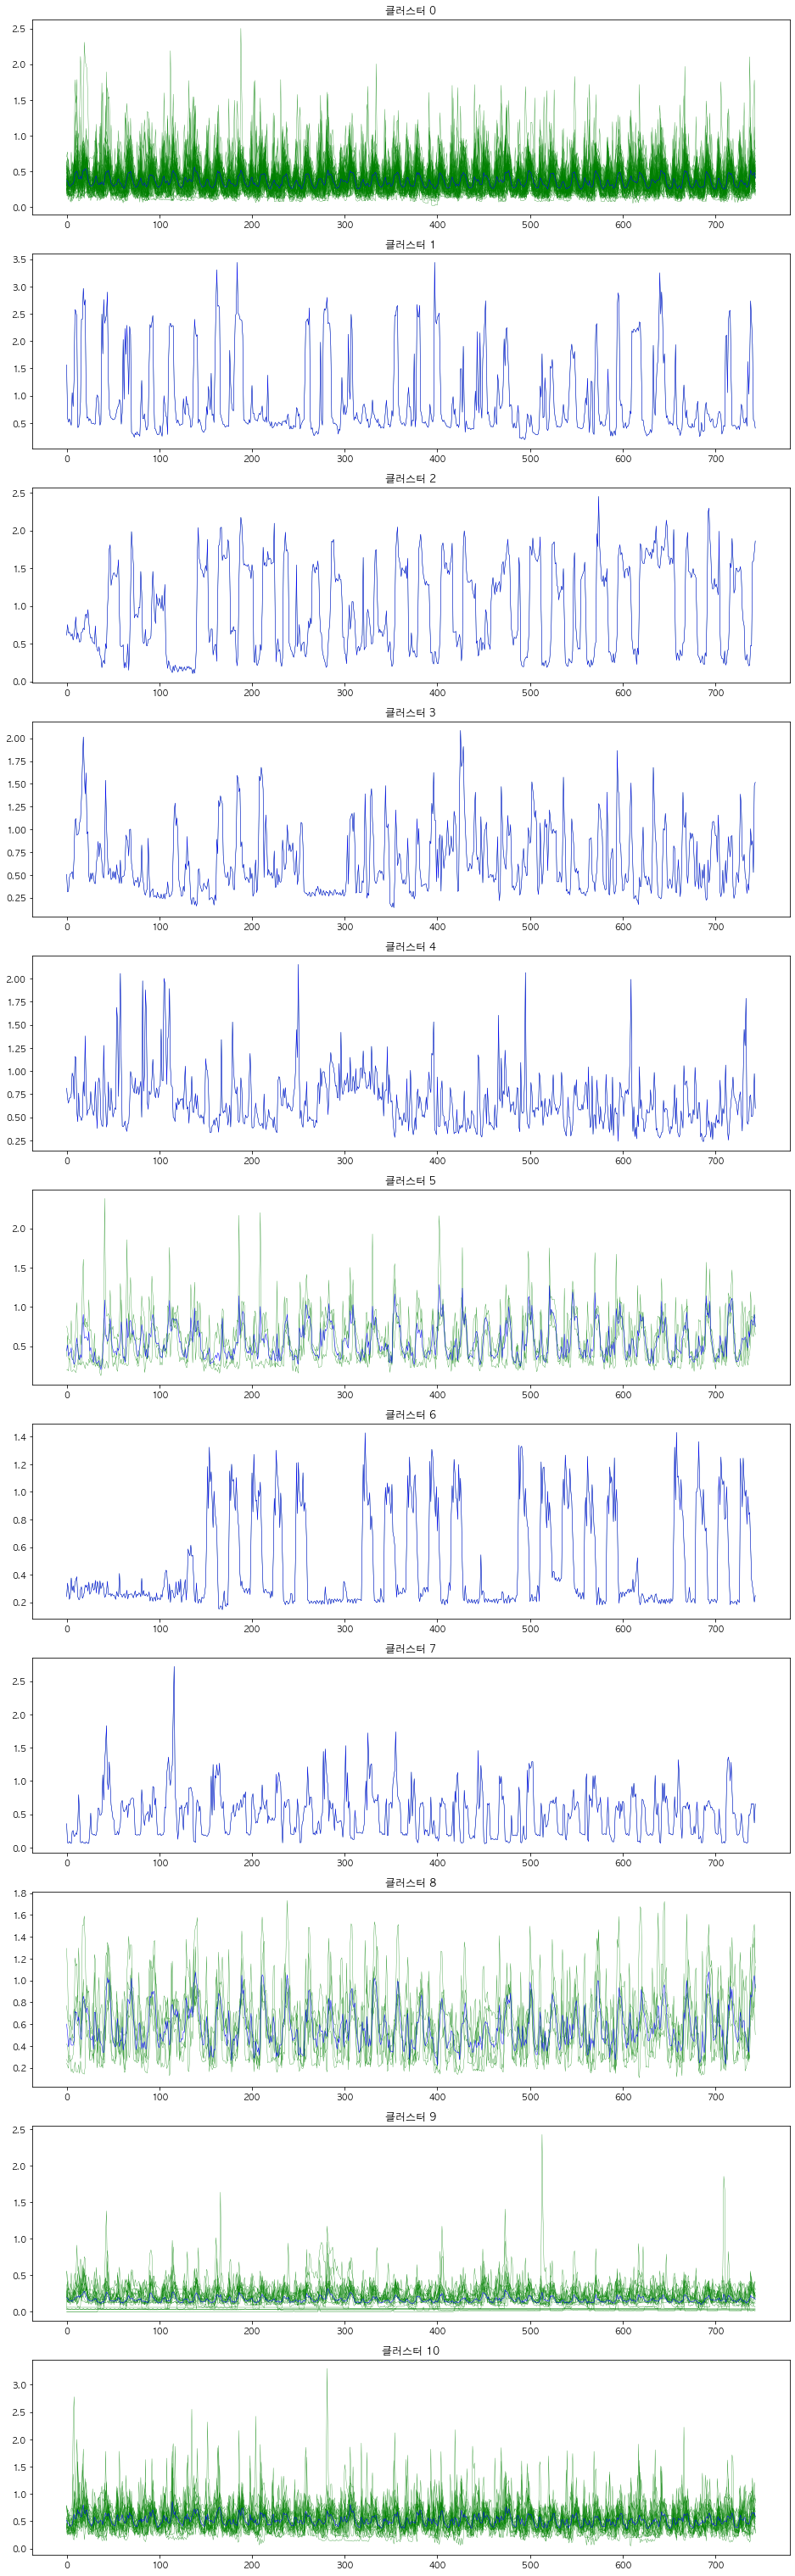

In [194]:
tdKMeans.fit()
tdKMeans.draw_plot(col_size=1)

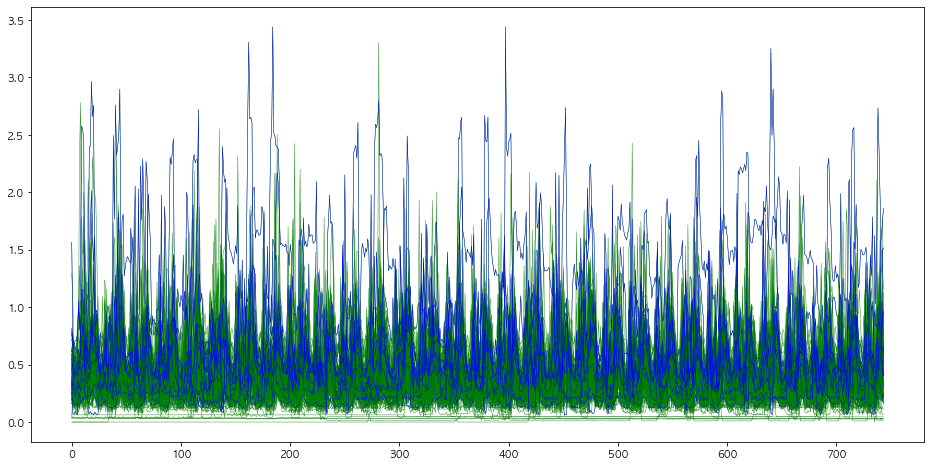

In [195]:
plt.figure(figsize=(16,8))

plt.plot(tdKMeans.datas.T, color='g', linewidth=0.4)
plt.plot(tdKMeans.clusters_.T, color='b', linewidth=0.4)

plt.show()

# 기여도 산정

## 그룹화

### label number 부여

In [196]:
_month_df = np.column_stack([m_60_1.columns, m_60_1.sum(axis=0).values.round().astype("int")])
month_df = pd.DataFrame(_month_df, columns=['name', 'usage (kWh)'])

month_df

,name,usage (kWh)
0,아파트1-104-1206,99
1,아파트1-104-303,10
2,아파트1-104-1307,23
3,아파트1-104-1208,40
4,아파트1-104-408,39
...,...,...
103,아파트1-103-903,273
104,아파트1-103-1106,255
105,아파트1-103-705,228
106,아파트1-103-1505,384


In [197]:
labels, clusters = tdKMeans.labels_, tdKMeans.clusters_

_cluster_info = np.column_stack([month_df.values, labels])
cluster_info = pd.DataFrame(_cluster_info, columns=['name', 'usage (kWh)','그룹 번호'])

cluster_info.head(10)

,name,usage (kWh),그룹 번호
0,아파트1-104-1206,99,9
1,아파트1-104-303,10,9
2,아파트1-104-1307,23,9
3,아파트1-104-1208,40,9
4,아파트1-104-408,39,9
5,아파트1-104-203,197,9
6,아파트1-103-1402,218,0
7,아파트1-103-402,228,0
8,아파트1-103-1201,84,9
9,아파트1-103-801,223,0


In [198]:
_labels = np.unique(labels)
label_cnt = np.array([np.where(labels == _label)[0].size for _label in _labels])

_cont = np.column_stack([_labels, label_cnt])
cont = pd.DataFrame(_cont, columns=['그룹 번호', '가구 수'])

cont.set_index("그룹 번호", inplace=True)
cont['median'] = clusters.sum(axis=1).round().astype("int")

cont

,가구 수,median
그룹 번호,,
0,53,266
1,1,689
2,1,711
3,1,473
4,1,498
5,3,417
6,1,351
7,1,369
8,5,423


## 기여도 산정 1. 그룹의 중간값 ( 클러스터 패턴의 사용량 ) 을 이용한 기여도 산정

In [199]:
cont_1 = cont.copy()

total_median = cont_1['median'].sum()
cont_1['contribution'] = cont_1['median'].map(lambda x: x / total_median)

cont_1

,가구 수,median,contribution
그룹 번호,,,
0,53,266,0.056524
1,1,689,0.146409
2,1,711,0.151084
3,1,473,0.100510
4,1,498,0.105822
5,3,417,0.088610
6,1,351,0.074586
7,1,369,0.078411
8,5,423,0.089885


## 기여도 산정 2. 그룹 안에 속해있는 가구들의 사용량 총합으로 기여도 산정

In [200]:
cont_2 = cont.copy()

households_kWh = cluster_info['usage (kWh)'].sum()

cont_2['usage total'] = np.array(
    [cluster_info[cluster_info['그룹 번호'] == _label]['usage (kWh)'].sum() for _label in _labels]
)
cont_2['contribution'] = cont_2['usage total'].map(lambda x: x / households_kWh)

cont_2

,가구 수,median,usage total,contribution
그룹 번호,,,,
0,53,266,14084,0.452803
1,1,689,689,0.022151
2,1,711,711,0.022859
3,1,473,473,0.015207
4,1,498,498,0.016011
5,3,417,1249,0.040156
6,1,351,351,0.011285
7,1,369,369,0.011863
8,5,423,2117,0.068062


# 가격분배

## 단순 가격 분배

In [201]:
_public_bill = round(public_bill / len(cluster_info))
_public_bill

24450

In [202]:
simple_dist_1 = cont_1.copy()

simple_dist_1['공용부 요금'] = simple_dist_1['가구 수'].map(lambda x: x * _public_bill)
simple_dist_1['단순 가격분배'] = (simple_dist_1['공용부 요금'] * simple_dist_1['contribution']).round().astype("int")

simple_dist_1['가구 별 분배 가격'] = simple_dist_1.apply(lambda x: int(x['단순 가격분배'] / x['가구 수']), axis=1)

simple_dist_1

,가구 수,median,contribution,공용부 요금,단순 가격분배,가구 별 분배 가격
그룹 번호,,,,,,
0,53,266,0.056524,1295850,73246,1382
1,1,689,0.146409,24450,3580,3580
2,1,711,0.151084,24450,3694,3694
3,1,473,0.100510,24450,2457,2457
4,1,498,0.105822,24450,2587,2587
5,3,417,0.088610,73350,6500,2166
6,1,351,0.074586,24450,1824,1824
7,1,369,0.078411,24450,1917,1917
8,5,423,0.089885,122250,10988,2197


In [203]:
simple_info_1 = cluster_info.copy()

simple_info_1['단순 가격분배'] = simple_info_1['그룹 번호'].map(
        lambda x: int(simple_dist_1.loc[x]['가구 별 분배 가격'])
)

simple_info_1['공용부 요금 나머지'] = round((public_bill - simple_info_1['단순 가격분배'].sum()) / len(cluster_info))
simple_info_1['최종 공용부 요금'] = simple_info_1['단순 가격분배'] + simple_info_1['공용부 요금 나머지']

simple_info_1.head(10)

,name,usage (kWh),그룹 번호,단순 가격분배,공용부 요금 나머지,최종 공용부 요금
0,아파트1-104-1206,99,9,639,22953,23592
1,아파트1-104-303,10,9,639,22953,23592
2,아파트1-104-1307,23,9,639,22953,23592
3,아파트1-104-1208,40,9,639,22953,23592
4,아파트1-104-408,39,9,639,22953,23592
5,아파트1-104-203,197,9,639,22953,23592
6,아파트1-103-1402,218,0,1382,22953,24335
7,아파트1-103-402,228,0,1382,22953,24335
8,아파트1-103-1201,84,9,639,22953,23592
9,아파트1-103-801,223,0,1382,22953,24335


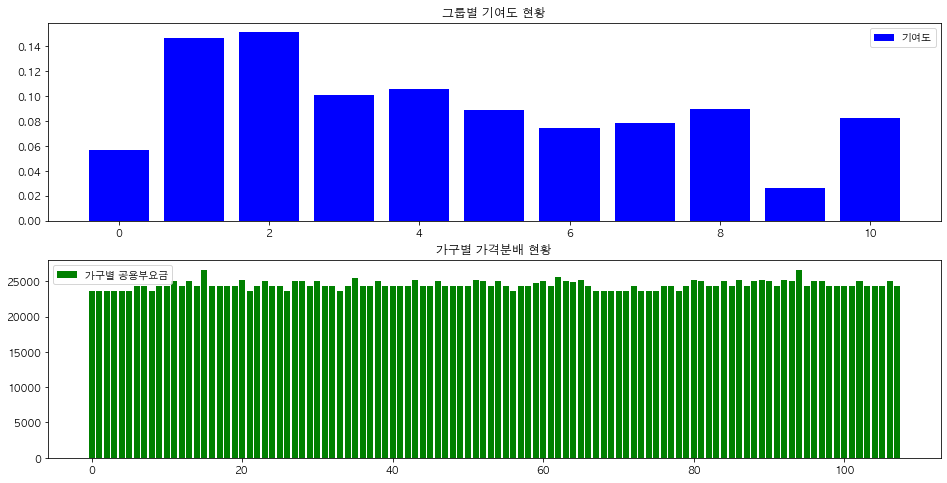

In [204]:
plt.figure(figsize=(16,8))

ax_1 = plt.subplot(2,1,1)
ax_1.bar(range(len(simple_dist_1)), simple_dist_1['contribution'], color='b', label='기여도')
ax_1.set_title("그룹별 기여도 현황")
ax_1.legend()

ax_2 = plt.subplot(2,1,2)
ax_2.bar(range(len(simple_info_1)), simple_info_1['최종 공용부 요금'], color='g', label='가구별 공용부요금')
ax_2.set_title("가구별 가격분배 현황")
ax_2.legend()

plt.show()

In [205]:
min_h = simple_info_1[simple_info_1['name'] == '아파트1-104-905']
mean_h = simple_info_1[simple_info_1['name'] == '아파트1-102-801']
max_h = simple_info_1[simple_info_1['name'] == '아파트1-102-903']

problem_simple_cont = pd.concat([min_h, mean_h, max_h])
problem_simple_cont

,name,usage (kWh),그룹 번호,단순 가격분배,공용부 요금 나머지,최종 공용부 요금
69,아파트1-104-905,148,9,639,22953,23592
44,아파트1-102-801,280,0,1382,22953,24335
15,아파트1-102-903,711,2,3694,22953,26647


## 기여도 요금

In [206]:
# 예측 시뮬레이션
pp = PublicPredictor(
    APT=APT,
    month_df=month_df[['name', 'usage (kWh)']],
    month=_month
)
pp.predict

실제 요금    2640560
예측 요금    2639700
오차           860
dtype: int64

In [207]:
col_df = cont.copy()

col_df['공용부 기본요금'] = (round(pp.basic / len(month_df)) * col_df['가구 수']).round().astype("int")
col_df['공용부 전력량요금'] = round(pp.elec_rate / len(month_df)) * col_df['가구 수'].round().astype("int")

col_df

,가구 수,median,공용부 기본요금,공용부 전력량요금
그룹 번호,,,,
0,53,266,225356,879482
1,1,689,4252,16594
2,1,711,4252,16594
3,1,473,4252,16594
4,1,498,4252,16594
5,3,417,12756,49782
6,1,351,4252,16594
7,1,369,4252,16594
8,5,423,21260,82970


In [208]:
dist_1 = pd.concat([cont_1, col_df[col_df.columns[-2:]]], axis=1)

dist_1['기여도 공용부 기본요금'] = (dist_1['공용부 기본요금'] * dist_1['contribution']).round().astype("int")
dist_1['기여도 공용부 전력량요금'] = (dist_1['공용부 전력량요금'] * dist_1['contribution']).round().astype("int")
dist_1['기여도 공용부 요금'] = dist_1['기여도 공용부 기본요금'] + dist_1['기여도 공용부 전력량요금']
dist_1['가구 별 분배 가격'] = (dist_1['기여도 공용부 요금'] / dist_1['가구 수']).round().astype("int")

dist_1

,가구 수,median,contribution,공용부 기본요금,공용부 전력량요금,기여도 공용부 기본요금,기여도 공용부 전력량요금,기여도 공용부 요금,가구 별 분배 가격
그룹 번호,,,,,,,,,
0,53,266,0.056524,225356,879482,12738,49711,62449,1178
1,1,689,0.146409,4252,16594,623,2430,3053,3053
2,1,711,0.151084,4252,16594,642,2507,3149,3149
3,1,473,0.100510,4252,16594,427,1668,2095,2095
4,1,498,0.105822,4252,16594,450,1756,2206,2206
5,3,417,0.088610,12756,49782,1130,4411,5541,1847
6,1,351,0.074586,4252,16594,317,1238,1555,1555
7,1,369,0.078411,4252,16594,333,1301,1634,1634
8,5,423,0.089885,21260,82970,1911,7458,9369,1874


In [209]:
dist_info_1 = cluster_info.copy()

dist_info_1['단순 가격분배'] = dist_info_1['그룹 번호'].map(
        lambda x: int(dist_1.loc[x]['가구 별 분배 가격'])
)

dist_info_1['공용부 요금 나머지'] = round((public_bill - dist_info_1['단순 가격분배'].sum()) / len(dist_info_1))
dist_info_1['최종 공용부 요금'] = dist_info_1['단순 가격분배'] + dist_info_1['공용부 요금 나머지']

dist_info_1.head(10)

,name,usage (kWh),그룹 번호,단순 가격분배,공용부 요금 나머지,최종 공용부 요금
0,아파트1-104-1206,99,9,545,23173,23718
1,아파트1-104-303,10,9,545,23173,23718
2,아파트1-104-1307,23,9,545,23173,23718
3,아파트1-104-1208,40,9,545,23173,23718
4,아파트1-104-408,39,9,545,23173,23718
5,아파트1-104-203,197,9,545,23173,23718
6,아파트1-103-1402,218,0,1178,23173,24351
7,아파트1-103-402,228,0,1178,23173,24351
8,아파트1-103-1201,84,9,545,23173,23718
9,아파트1-103-801,223,0,1178,23173,24351


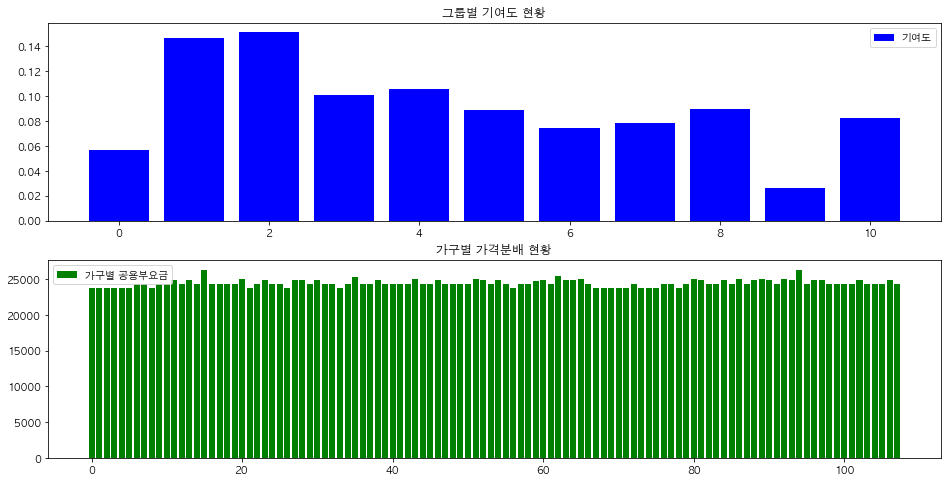

In [210]:
plt.figure(figsize=(16,8))

ax_1 = plt.subplot(2,1,1)
ax_1.bar(range(len(dist_1)), dist_1['contribution'], color='b', label='기여도')
ax_1.set_title("그룹별 기여도 현황")
ax_1.legend()

ax_2 = plt.subplot(2,1,2)
ax_2.bar(range(len(dist_info_1)), dist_info_1['최종 공용부 요금'], color='g', label='가구별 공용부요금')
ax_2.set_title("가구별 가격분배 현황")
ax_2.legend()

plt.show()

In [211]:
min_h = dist_info_1[dist_info_1['name'] == '아파트1-104-905']
mean_h = dist_info_1[dist_info_1['name'] == '아파트1-102-801']
max_h = dist_info_1[dist_info_1['name'] == '아파트1-102-903']

problem_simple_cont = pd.concat([min_h, mean_h, max_h])
problem_simple_cont

,name,usage (kWh),그룹 번호,단순 가격분배,공용부 요금 나머지,최종 공용부 요금
69,아파트1-104-905,148,9,545,23173,23718
44,아파트1-102-801,280,0,1178,23173,24351
15,아파트1-102-903,711,2,3149,23173,26322


## 기여도 적용비율 요금

In [212]:
norm_dist = cont_1.copy()

norm_dist['contribution'] = (norm_dist['contribution'] - norm_dist['contribution'].min()) / \
                    (norm_dist['contribution'].max() - norm_dist['contribution'].min())

norm_dist = pd.concat([norm_dist, col_df[col_df.columns[-2:]]], axis=1)

norm_dist['기여도 공용부 기본요금'] = (norm_dist['공용부 기본요금'] * norm_dist['contribution']).round().astype("int")
norm_dist['기여도 공용부 전력량요금'] = (norm_dist['공용부 전력량요금'] * norm_dist['contribution']).round().astype("int")
norm_dist['기여도 공용부 요금'] = norm_dist['기여도 공용부 기본요금'] + norm_dist['기여도 공용부 전력량요금']
norm_dist['가구 별 분배 가격'] = (norm_dist['기여도 공용부 요금'] / norm_dist['가구 수']).round().astype("int")

norm_dist

,가구 수,median,contribution,공용부 기본요금,공용부 전력량요금,기여도 공용부 기본요금,기여도 공용부 전력량요금,기여도 공용부 요금,가구 별 분배 가격
그룹 번호,,,,,,,,,
0,53,266,0.243197,225356,879482,54806,213888,268694,5070
1,1,689,0.962585,4252,16594,4093,15973,20066,20066
2,1,711,1.000000,4252,16594,4252,16594,20846,20846
3,1,473,0.595238,4252,16594,2531,9877,12408,12408
4,1,498,0.637755,4252,16594,2712,10583,13295,13295
5,3,417,0.500000,12756,49782,6378,24891,31269,10423
6,1,351,0.387755,4252,16594,1649,6434,8083,8083
7,1,369,0.418367,4252,16594,1779,6942,8721,8721
8,5,423,0.510204,21260,82970,10847,42332,53179,10636


In [213]:
norm_dist_info = cluster_info.copy()

norm_dist_info['단순 가격분배'] = norm_dist_info['그룹 번호'].map(
        lambda x: int(norm_dist.loc[x]['가구 별 분배 가격'])
)

norm_dist_info['공용부 요금 나머지'] = round((public_bill - norm_dist_info['단순 가격분배'].sum()) / len(norm_dist_info))
norm_dist_info['최종 공용부 요금'] = norm_dist_info['단순 가격분배'] + norm_dist_info['공용부 요금 나머지']

norm_dist_info.head(10)

,name,usage (kWh),그룹 번호,단순 가격분배,공용부 요금 나머지,최종 공용부 요금
0,아파트1-104-1206,99,9,0,18594,18594
1,아파트1-104-303,10,9,0,18594,18594
2,아파트1-104-1307,23,9,0,18594,18594
3,아파트1-104-1208,40,9,0,18594,18594
4,아파트1-104-408,39,9,0,18594,18594
5,아파트1-104-203,197,9,0,18594,18594
6,아파트1-103-1402,218,0,5070,18594,23664
7,아파트1-103-402,228,0,5070,18594,23664
8,아파트1-103-1201,84,9,0,18594,18594
9,아파트1-103-801,223,0,5070,18594,23664


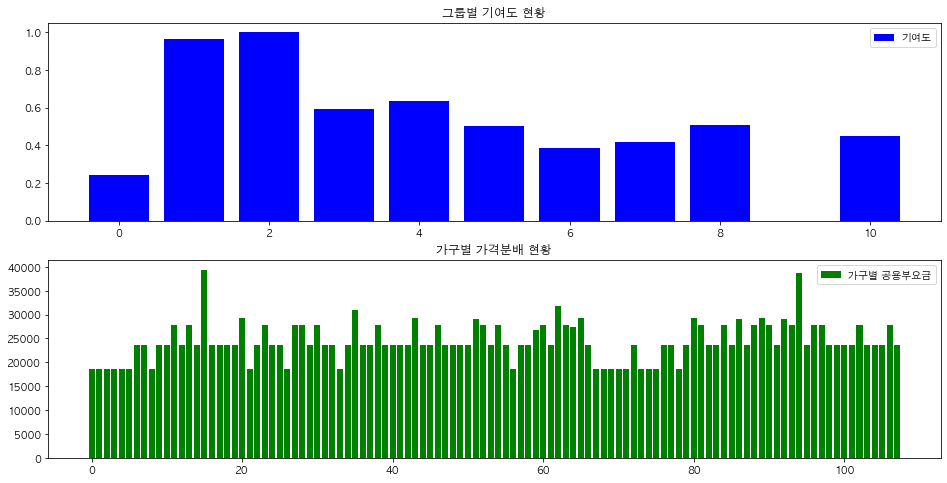

In [214]:
plt.figure(figsize=(16,8))

ax_1 = plt.subplot(2,1,1)
ax_1.bar(range(len(dist_1)), norm_dist['contribution'], color='b', label='기여도')
ax_1.set_title("그룹별 기여도 현황")
ax_1.legend()

ax_2 = plt.subplot(2,1,2)
ax_2.bar(range(len(dist_info_1)), norm_dist_info['최종 공용부 요금'], color='g', label='가구별 공용부요금')
ax_2.set_title("가구별 가격분배 현황")
ax_2.legend()

plt.show()

In [215]:
min_h = norm_dist_info[norm_dist_info['name'] == '아파트1-104-905']
mean_h = norm_dist_info[norm_dist_info['name'] == '아파트1-102-801']
max_h = norm_dist_info[norm_dist_info['name'] == '아파트1-102-903']

problem_simple_cont = pd.concat([min_h, mean_h, max_h])
problem_simple_cont

,name,usage (kWh),그룹 번호,단순 가격분배,공용부 요금 나머지,최종 공용부 요금
69,아파트1-104-905,148,9,0,18594,18594
44,아파트1-102-801,280,0,5070,18594,23664
15,아파트1-102-903,711,2,20846,18594,39440
